#**MATRIZ DE CORRELACIÓN**


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [109]:
df_unido = pd.read_excel("/content/df_unido_def_2.xlsx")

In [110]:
# Eliminar columnas no numéricas
drop_columns = ['FACILITY_NAME','FAC_STR_ADDR', 'FAC_CITY', 'FAC_OPERATED_THIS_YR',
       'COUNTY', 'FACILITY_LEVEL', 'LIC_CAT', 'LICEE_TOC']
df = df_unido.drop(columns=drop_columns)

In [111]:
# Mostrar columnas no numericas y sus valores
variables_no_numericas = df_unido.select_dtypes(exclude=['number']).columns

for columna in variables_no_numericas:
    print(f"Valores únicos en la columna '{columna}':")
    print(df_unido[columna].unique())
    print()

Valores únicos en la columna 'FACILITY_NAME':
['ALAMEDA HOSPITAL' 'ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CAMPUS'
 "CHILDREN'S HOSPITAL AT MISSION"
 "UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND" 'HIGHLAND HOSPITAL'
 'ALTA BATES SUMMIT MED CTR-SUMMIT CAMPUS-HAWTHORNE'
 'ALTA BATES SUMMIT MEDICAL CENTER' 'ST. ROSE HOSPITAL'
 'WASHINGTON HOSPITAL - FREMONT' 'STANFORD HEALTH CARE - VALLEYCARE'
 'STANFORD HEALTH CARE' 'EDEN MEDICAL CENTER' 'SUTTER AMADOR HOSPITAL'
 'ORCHARD HOSPITAL' 'OROVILLE HOSPITAL' 'ENLOE MEDICAL CENTER- ESPLANADE'
 'MARK TWAIN MEDICAL CENTER' 'COLUSA MEDICAL CENTER'
 'CONTRA COSTA REGIONAL MEDICAL CENTER' 'SUTTER DELTA MEDICAL CENTER'
 'JOHN MUIR MEDICAL CENTER-WALNUT CREEK CAMPUS'
 'KAISER FOUNDATION HOSPITAL - WALNUT CREEK'
 'JOHN MUIR MEDICAL CENTER-CONCORD CAMPUS'
 'SAN RAMON REGIONAL MEDICAL CENTER'
 'KAISER FOUNDATION HOSPITAL - ANTIOCH' 'SUTTER COAST HOSPITAL'
 'BARTON MEMORIAL HOSPITAL' 'MARSHALL MEDICAL CENTER'
 'CLOVIS COMMUNITY MEDICAL CENTER' 'COALINGA R

In [112]:
# Reemplazar el string '0' por 'No'
df['BED_CLASS_GEN_ACUTE_CARE_SERVICE'] = df['BED_CLASS_GEN_ACUTE_CARE_SERVICE'].replace('0', 'No')
df['BED_CLASS_SN_HOSPICE_SERVICE'] = df['BED_CLASS_SN_HOSPICE_SERVICE'].replace('0', 'No')
df['INPATIENT_PALLIATIVE_CARE_PROG_OFFERED'] = df['INPATIENT_PALLIATIVE_CARE_PROG_OFFERED'].replace('0', 'No')
df['OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED'] = df['OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED'].replace('0', 'No')
df['LIC_ED_LEV_BEGIN'] = df['LIC_ED_LEV_BEGIN'].replace('0', 'No')

In [113]:
# Verificar los valores únicos y asociar valores numéricos a otras columnas categóricas
for column in df.select_dtypes(exclude=['number']).columns:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapeo de valores para '{column}': {mapping}")

Mapeo de valores para 'TRAUMA_CTR': {'Non-Trauma Center': 0, 'Level I - Pediatric': 1, 'Level II': 2, 'Level I': 3, 'Level IV': 4, 'Level III': 5, 'Level II & Level II - Ped': 6, 'Level I & Level II - Ped': 7, 'Level I & Level I - Ped': 8, 'Level II - Pediatric': 9}
Mapeo de valores para 'TEACH_HOSP': {'No': 0, 'Yes': 1}
Mapeo de valores para 'PRIN_SERVICE_TYPE': {'General Medical / Surgical': 0, 'Pediatric': 1, nan: 2, 'Other': 3, 'Long-Term Care (SN/IC)': 4, 'Long-Term Care (SN / IC)': 5, 'Psychiatric': 6}
Mapeo de valores para 'SHORT_DOYLE_SERVICES_OFFERED': {'No': 0, 'Yes': 1}
Mapeo de valores para 'INPATIENT_HOSPICE_PROG_OFFERED': {'No': 0, 'Yes': 1}
Mapeo de valores para 'BED_CLASS_GEN_ACUTE_CARE_SERVICE': {'No': 0, 'Yes': 1}
Mapeo de valores para 'BED_CLASS_SN_HOSPICE_SERVICE': {'No': 0, 'Yes': 1}
Mapeo de valores para 'BED_CLASS_IC_HOSPICE_SERVICE': {'No': 0, 'Yes': 1}
Mapeo de valores para 'INPATIENT_PALLIATIVE_CARE_PROG_OFFERED': {'No': 0, 'Yes': 1}
Mapeo de valores para 'OUT

In [114]:
# Nombre de todas las variables
columnas = df.columns.tolist()
print(columnas)

['FAC_NO', 'YEAR', 'FAC_NO_YEAR', 'FAC_ZIP', 'TRAUMA_CTR', 'TEACH_HOSP', 'PRIN_SERVICE_TYPE', 'MED_SURG_LIC_BEDS', 'MED_SURG_LIC_BED_DAYS', 'MED_SURG_DISCHARGES', 'MED_SURG_CEN_DAYS', 'PERINATAL_LIC_BEDS', 'PERINATAL_LIC_BED_DAYS', 'PERINATAL_DISCHARGES', 'PERINATAL_CEN_DAYS', 'PEDIATRIC_LIC_BEDS', 'PEDIATRIC_LIC_BED_DAYS', 'PEDIATRIC_DISCHARGES', 'PEDIATRIC_CEN_DAYS', 'IC_LIC_BEDS', 'IC_LIC_BED_DAYS', 'IC_DISCHARGES', 'IC_INTRA_TRANSFERS', 'IC_CEN_DAYS', 'CORONARY_CARE_LIC_BEDS', 'CORONARY_CARE_LIC_BED_DAYS', 'CORONARY_CARE_DISCHARGES', 'CORONARY_CARE_INTRA_TRANSFERS', 'CORONARY_CARE_CEN_DAYS', 'ACUTE_RESPIRATORY_CARE_LIC_BEDS', 'ACUTE_RESPIRATORY_CARE_LIC_BED_DAYS', 'ACUTE_RESPIRATORY_CARE_DISCHARGES', 'ACUTE_RESPIRATORY_CARE_INTRA_TRANSFERS', 'ACUTE_RESPIRATORY_CARE_CEN_DAYS', 'BURN_LIC_BEDS', 'BURN_LIC_BED_DAYS', 'BURN_DISCHARGES', 'BURN_INTRA_TRANSFERS', 'BURN_CEN_DAYS', 'IC_NEWBORN_LIC_BEDS', 'IC_NEWBORN_LIC_BED_DAYS', 'IC_NEWBORN_DISCHARGES', 'IC_NEWBORN_INTRA_TRANSFERS', 'IC_NE

In [137]:
#Variables divididas por temática
var_hops = ['TRAUMA_CTR', 'TEACH_HOSP', 'PRIN_SERVICE_TYPE', 'MED_SURG_LIC_BEDS', 'MED_SURG_LIC_BED_DAYS', 'MED_SURG_DISCHARGES', 'MED_SURG_CEN_DAYS', 'PERINATAL_LIC_BEDS', 'PERINATAL_LIC_BED_DAYS', 'PERINATAL_DISCHARGES', 'PERINATAL_CEN_DAYS', 'PEDIATRIC_LIC_BEDS', 'PEDIATRIC_LIC_BED_DAYS', 'PEDIATRIC_DISCHARGES', 'PEDIATRIC_CEN_DAYS', 'IC_LIC_BEDS', 'IC_LIC_BED_DAYS', 'IC_DISCHARGES', 'IC_INTRA_TRANSFERS', 'IC_CEN_DAYS', 'CORONARY_CARE_LIC_BEDS', 'CORONARY_CARE_LIC_BED_DAYS', 'CORONARY_CARE_DISCHARGES', 'CORONARY_CARE_INTRA_TRANSFERS', 'CORONARY_CARE_CEN_DAYS', 'ACUTE_RESPIRATORY_CARE_LIC_BEDS', 'ACUTE_RESPIRATORY_CARE_LIC_BED_DAYS', 'ACUTE_RESPIRATORY_CARE_DISCHARGES', 'ACUTE_RESPIRATORY_CARE_INTRA_TRANSFERS', 'ACUTE_RESPIRATORY_CARE_CEN_DAYS', 'BURN_LIC_BEDS', 'BURN_LIC_BED_DAYS', 'BURN_DISCHARGES', 'BURN_INTRA_TRANSFERS', 'BURN_CEN_DAYS', 'IC_NEWBORN_LIC_BEDS', 'IC_NEWBORN_LIC_BED_DAYS', 'IC_NEWBORN_DISCHARGES', 'IC_NEWBORN_INTRA_TRANSFERS', 'IC_NEWBORN_CEN_DAYS', 'REHAB_CTR_LIC_BEDS', 'REHAB_CTR_LIC_BED_DAYS', 'REHAB_CTR_DISCHARGES', 'REHAB_CTR_CEN_DAYS', 'GAC_SUBTOT_LIC_BEDS', 'GAC_SUBTOT_LIC_BED_DAYS', 'GAC_SUBTOT_DISCHARGES', 'GAC_SUBTOT_CEN_DAYS', 'CHEM_DEPEND_RECOVERY_LIC_BEDS', 'CHEM_DEPEND_RECOVERY_LIC_BED_DAYS', 'CHEM_DEPEND_RECOVERY_DISCHARGES', 'CHEM_DEPEND_RECOV_CEN_DAYS', 'ACUTE_PSYCHIATRIC_LIC_BEDS', 'ACUTE_PSYCHIATRIC_LIC_BED_DAYS', 'ACUTE_PSYCHIATRIC_DISCHARGES', 'ACUTE_PSYCHIATRIC_CEN_DAYS', 'SN_LIC_BEDS', 'SN_LIC_BED_DAYS', 'SN_DISCHARGES', 'SN_INTRA_TRANSFERS', 'SN_CEN_DAYS', 'INTERMEDIATE_CARE_LIC_BEDS', 'INTERMEDIATE_CARE_LIC_BED_DAYS', 'INTERMEDIATE_CARE_DISCHARGES', 'INTERMEDIATE_CARE_CEN_DAYS', 'TOT_LIC_BEDS', 'TOT_LIC_BED_DAYS', 'TOT_DISCHARGES', 'TOT_CEN_DAYS', 'GAC_CDRS_LIC_BEDS', 'GAC_CDRS_DISCHARGES', 'GAC_CDRS_CEN_DAYS', 'ACUTE_PSYCH_LIC_BEDS', 'ACUTE_PSYCH_DISCHARGES', 'ACUTE_PSYCH_CEN_DAYS', 'NEWBORN_NURSERY_BASSINETS', 'NEWBORN_NURSERY_INFANTS', 'NEWBORN_NURSERY_CEN_DAYS', 'GEN_ACUTE_CARE_SN_SWING_BEDS', 'ACUTE_PSYCHIATRIC_PATS_LOCKED_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_OPEN_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_TOT_BY_UNIT_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_0_TO_17_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_18_TO_64_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_65_AND_UP_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_TOT_BY_AGE_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_MED_TRAD_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_MED_MANAGED_CARE_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_MED_CAL_TRAD_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_MED_CAL_MANAGED_CARE_ON_1231', 'ACUTE_PSYCHIATRIC_PATS_COUNTY_INDIGENT_PROG', 'ACUTE_PSYCHIATRIC_PATS_3RD_PARTIES_TRAD', 'ACUTE_PSYCHIATRIC_PATS_3RD_PARTIES_MANAGED_CARE', 'ACUTE_PSYCHIATRIC_PATS_SHORT_DOYLE', 'ACUTE_PSYCHIATRIC_PATS_OTHER_INDIGENT', 'ACUTE_PSYCHIATRIC_PATS_OTHER_PAYERS', 'ACUTE_PSYCHIATRIC_PATS_TOT_BY_PAYOR', 'SHORT_DOYLE_SERVICES_OFFERED', 'INPATIENT_HOSPICE_PROG_OFFERED', 'BED_CLASS_GEN_ACUTE_CARE_SERVICE', 'BED_CLASS_SN_HOSPICE_SERVICE', 'BED_CLASS_IC_HOSPICE_SERVICE', 'INPATIENT_PALLIATIVE_CARE_PROG_OFFERED', 'INPATIENT_PALLIATIVE_CARE_PROG_NURSES', 'INPATIENT_PALLIATIVE_CARE_PROG_NURSES_CERTIFIED', 'INPATIENT_PALLIATIVE_CARE_PROG_PHYSICIAN', 'INPATIENT_PALLIATIVE_CARE_PROG_PHYSICIAN_CERTIFIED', 'INPATIENT_PALLIATIVE_CARE_PROG_SOCIAL_WORKER', 'INPATIENT_PALLIATIVE_CARE_PROG_SOCIAL_WORKER_CERTIFIED', 'INPATIENT_PALLIATIVE_CARE_PROG_CHAPLAINS', 'OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED', 'LIC_ED_LEV_BEGIN', 'LIC_ED_LEV_END', 'AVAIL_SERVICES_ANESTHESIOLOGIST_24HR', 'AVAIL_SERVICES_ANESTHESIOLOGIST_ON_CALL', 'AVAIL_SERVICES_LAB_24HR', 'AVAIL_SERVICES_LAB_ON_CALL', 'AVAIL_SERVICES_OPER_RM_24HR', 'AVAIL_SERVICES_OPER_RM_ON_CALL', 'AVAIL_SERVICES_PHARMACIST_24HR', 'AVAIL_SERVICES_PHARMACIST_ON_CALL', 'AVAIL_SERVICES_PHYSICIAN_24HR', 'AVAIL_SERVICES_PHYSICIAN_ON_CALL', 'AVAIL_SERVICES_PSYCHIATRIC_ER_24HR', 'AVAIL_SERVICES_PSYCHIATRIC_ER_ON_CALL', 'AVAIL_SERVICES_RADIOLOGY_24HR', 'AVAIL_SERVICES_RADIOLOGY_ON_CALL', 'EMS_VISITS_NON_URGENT_TOT', 'EMS_VISITS_NON_URGENT_ADMITTED', 'EMS_VISITS_URGENT_TOT', 'EMS_VISITS_URGENT_ADMITTED', 'EMS_VISITS_MODERATE_TOT', 'EMS_VISITS_MODERATE_ADMITTED', 'EMS_VISITS_SEVERE_TOT', 'EMS_VISITS_SEVERE_ADMITTED', 'EMS_VISITS_CRITICAL_TOT', 'EMS_VISITS_CRITICAL_ADMITTED', 'EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT', 'ADMITTED_FROM_EMER_DEPT_TOT', 'ER_TRAFFIC_TOT', 'EMER_MED_TREAT_STATIONS_ON_1231', 'NON_EMER_VISITS_IN_EMER_DEPT', 'EMER_REGISTRATIONS_PATS_LEAVE_WO_BEING_SEEN', 'EMER_DEPT_AMBULANCE_DIVERSION_HOURS', 'EMER_DEPT_HR_DIVERSION_TOT', 'INPATIENT_SURG_OPER', 'OUTPATIENT_SURG_OPER', 'INPAT_OPER_RM', 'OUTPAT_OPER_RM', 'INPAT_OUTPAT_OPER_RM', 'OPER_RM_TOT', 'OFFER_AMBULATORY_SURG_PROG', 'LIVE_BIRTHS_TOT', 'LIVE_BIRTHS_LT_2500GM', 'LIVE_BIRTHS_LT_1500GM', 'OFFER_ALTERNATE_BIRTH_PROG', 'ALTERNATE_SETTING_LDR', 'ALTERNATE_SETTING_LDRP', 'LIVE_BIRTHS_IN_ALTERNATIVE_SETTING', 'LIVE_BIRTHS_C_SECTION', 'LIC_CARDIOLOGY_CARDIOVASCULAR_SURG_SERVICES', 'CARDIOVASCULAR_OPER_RM', 'CARDIOVASCULAR_SURG_OPER_PEDIATRIC_BYPASS_USED', 'CARDIOVASCULAR_SURG_OPER_PEDIATRIC_BYPASS_NOT_USED', 'CARDIOVASCULAR_SURG_OPER_ADULT_BYPASS_USED', 'CARDIOVASCULAR_SURG_OPER_ADULT_BYPASS_NOT_USED', 'CARDIOVASCULAR_SURG_OPER_BYPASS_USED_TOT', 'CARDIOVASCULAR_SURG_OPER_BYPASS_NOT_USED_TOT', 'CORONARY_ARTERY_BYPASS_GRAFT_SURG', 'CARDIAC_CATHETERIZATION_LAB_RM', 'CARD_CATH_PED_IP_DIAG_VST', 'CARD_CATH_PED_IP_THER_VST', 'CARD_CATH_PED_OP_DIAG_VST', 'CARD_CATH_PED_OP_THER_VST', 'CARDIAC_CATHETERIZATION_ADULT_INPAT_DIAGNOSTIC_VISITS', 'CARDIAC_CATHETERIZATION_ADULT_INPAT_THERAPEUTIC_VISITS', 'CARDIAC_CATHETERIZATION_ADULT_OUTPAT_DIAGNOSTIC_VISITS', 'CARDIAC_CATHETERIZATION_ADULT_OUTPAT_THERAPEUTIC_VISITS', 'CARDIAC_CATHETERIZATION_DIAGNOSTIC_VISITS_TOT', 'CARDIAC_CATHETERIZATION_THERAPEUTIC_VISITS_TOT', 'DIAGNOSTIC_CARDIAC_CATH_PROC', 'MYOCARDIAL_BIOPSY', 'PERM_PACEMAKER_IMPLANT', 'OTH_PERM_PACEMAKER_PROC', 'IMPLANABLE_CARDIO_DEFIB_IMPLANTATION', 'OTH_PROCEDURES', 'PCI_WITH_STENT', 'PCI_WO_STENT', 'ATHERECTOMY', 'THROMBOLYTIC_AGENTS', 'PTBV', 'DIAGNOSTIC_ELECTROPHYSIOLOGY_EP', 'CATHETER_ABLATION', 'PERIPHERAL_VASCULAR_ANGIOGRAPHY', 'PERIPHERAL_VASCULAR_INTERVENTIONAL', 'CAROTID_STENTING', 'INTRA_AORTIC_BALLOON_PUMP_INSERTION', 'CATHETER_BASED_VENTRICULAR_ASSIST_DEVICE_INSERTION', 'ALL_OTHER_CATHETERIZATION_PROC', 'CATHETERIZATION_PROC_TOT', 'MED_SURG_ALOS_CY', 'PERINATAL_ALOS_CY', 'PEDIATRIC_ALOS_CY', 'IC_ALOS_CY', 'CORONARY_CARE_ALOS_CY', 'ACUTE_RESPIRATORY_CARE_ALOS_CY', 'BURN_ALOS_CY', 'IC_NEWBORN_ALOS_CY', 'REHAB_CTR_ALOS_CY', 'GAC_SUBTOT_ALOS_CY', 'CHEM_DEPEND_RECOV_ALOS_CY', 'ACUTE_PSYCHIATRIC_ALOS_CY', 'SN_ALOS_CY', 'INTERMEDIATE_CARE_ALOS_CY', 'TOT_ALOS_CY', 'GAC_CDRS_ALOS_CY', 'ACUTE_PSYCH_CDRS_ALOS_CY', 'MED_SURG_ALOS_PY', 'PERINATAL_ALOS_PY', 'PEDIATRIC_ALOS_PY', 'IC_ALOS_PY', 'CORONARY_CARE_ALOS_PY', 'ACUTE_RESPIRATORY_CARE_ALOS_PY', 'BURN_ALOS_PY', 'IC_NEWBORN_ALOS_PY', 'REHAB_CTR_ALOS_PY', 'GAC_SUBTOT_ALOS_PY', 'CHEM_DEPEND_RECOV_ALOS_PY', 'ACUTE_PSYCHIATRIC_ALOS_PY', 'SN_ALOS_PY', 'INTERMEDIATE_CARE_ALOS_PY', 'TOT_ALOS_PY', 'GAC_CDRS_ALOS_PY', 'ACUTE_PSYCH_CDRS_ALOS_PY', 'EMSA_TRAUMA_DESIGNATION', 'EMSA_TRAUMA_DESIGNATION_PEDIATRIC', 'INPATIENT_AVG_PER_SURGERY', 'OUTPATIENT_AVG_PER_SURGERY']


var_urg = ["ER_TRAFFIC_TOT", 'Sex_Female', 'Sex_Male', 'Age_0_09', 'Age_10_19', 'Age_20_29', 'Age_30_39', 'Age_40_49', 'Age_50_59', 'Age_60_69', 'Age_70_79', 'Age_80_', 'Asian_Pacific_Islander', 'Black', 'Hispanic.or.Latino', 'Native_American_Eskimo_Aleut', 'White', 'disp_Acute_Care', 'disp_Against_Medical_Advice', 'disp_Died', 'disp_Home_Health_Service', 'disp_Hospice_Care', 'disp_Prison_Jail', 'disp_Psychiatric_Care', 'disp_Residential_Care', 'disp_Routine', 'disp_SN_IC_Care', 'disp_Childrens_or_Cancer', 'disp_CAH', 'dx_Pregnancy_Childbirth', 'dx_Diseases_of_the_Blood', 'dx_Circulatory', 'dx_Congenital', 'dx_Digestive', 'dx_Endocrine', 'dx_Genitourinary', 'dx_Infectious', 'dx_Injury_Poisoning', 'dx_Musculoskeletal', 'dx_Neoplasms', 'dx_Nervous_System', 'dx_Certain_Perinatal_Conditions', 'dx_Psychoses_Neuroses', 'dx_Respiratory', 'dx_Skin', 'dx_Symptoms_Signs_NEC', 'dx_Births', 'EC_Accidental_Falls', 'EC_Accidental_Poisoning', 'EC_Adverse_Effects_of_Drugs', 'EC_Fire_Accidents', 'EC_Inflicted_by_Others', 'EC_Late_Effects_of_Injury', 'EC_Misadventures_Complication', 'EC_Natural_Environment', 'EC_Self_Inflicted', 'EC_Submersion_Suffocation_Foreig', 'EC_War','English', 'Spanish', 'a_Sex_Female', 'a_Sex_Male', 'a_Age_10_19', 'a_Age_20_29', 'a_Age_30_39', 'a_Age_40_49', 'a_Age_50_59', 'a_Age_60_69', 'a_Age_70_79', 'a_Age_80_', 'a_Asian_Pacific_Islander', 'a_Black', 'a_Hispanic.or.Latino', 'a_White', 'a_Native_American_Eskimo_Aleut', 'a_disp_Acute_Care', 'a_disp_Against_Medical_Advice', 'a_disp_Died', 'a_disp_Home_Health_Service', 'a_disp_Residential_Care', 'a_disp_Routine', 'a_disp_SN_IC_Care', 'a_disp_Prison_Jail', 'a_disp_Hospice_Care', 'a_disp_Psychiatric_Care', 'a_disp_Childrens_or_Cancer', 'a_disp_CAH', 'a_dx_Pregnancy_Childbirth', 'a_dx_Diseases_of_the_Blood', 'a_dx_Circulatory', 'a_dx_Digestive', 'a_dx_Endocrine', 'a_dx_Genitourinary', 'a_dx_Infectious', 'a_dx_Injury_Poisoning', 'a_dx_Musculoskeletal', 'a_dx_Neoplasms', 'a_dx_Nervous_System', 'a_dx_Psychoses_Neuroses', 'a_dx_Respiratory', 'a_dx_Skin', 'a_dx_Symptoms_Signs_NEC', 'a_dx_births', 'a_dx_Congenital', 'a_dx_Certain_Perinatal_Condition', 'a_EC_Accidental_Falls', 'a_EC_Accidental_Poisoning', 'a_EC_Adverse_Effects_of_Drugs', 'a_EC_Inflicted_by_Others', 'a_EC_Late_Effects_of_Injury', 'a_EC_Misadventures_Complication', 'a_EC_None', 'a_EC_Other_Accidents', 'a_EC_Self_Inflicted', 'a_EC_Submersion_Suffocation_Fore', 'a_EC_Fire_Accidents', 'a_EC_Natural_Environment', 'a_EC_War', 'a_English', 'a_Spanish', 'a_Age_00_09', 'EC_All_Transport_Types', 'a_EC_All_Transport_Types','disp_Rehab', 'disp_Disaster_Care_Site', 'a_disp_Rehab', 'a_disp_Disaster_Care_Site', 'dx_Birth_Defects', 'dx_Cancer', 'dx_Ear', 'dx_Eye', 'EC_Abnormal_Reaction_Later_Cx', 'EC_Med_Device_Advrs_Incident', 'EC_NonTrans_Drowning_Subm', 'EC_Supplementary_Factors', 'EC_W_Inanimate_Animate_Object', 'a_dx_Birth_Defects', 'a_dx_Cancer', 'a_dx_Ear', 'a_dx_Eye', 'a_EC_Abnormal_Reaction_Later_Cx', 'a_EC_Med_Device_Advrs_Incident', 'a_EC_Supplementary_Factors', 'a_EC_W_Inanimate_Animate_Object', 'a_EC_NonTrans_Drowning_Subm', 'Non-Hispanic.or.Non-Latino', 'a_Non-Hispanic.or.Non-Latino', 'racegrp_aman', 'racegrp_asian', 'racegrp_black', 'racegrp_multirace', 'racegrp_nhpi', 'racegrp_white', 'eth_Hispanic', 'eth_NonHispanic', 'dx_Residual', 'a_racegrp_aman', 'a_racegrp_asian', 'a_racegrp_black', 'a_racegrp_multirace', 'a_racegrp_nhpi', 'a_racegrp_white', 'a_eth_Hispanic', 'a_eth_NonHispanic', 'a_DX_Residual', 'dx_Factors_Influencing_Health_St', 'a_dx_Factors_Influencing_Health_']
df_urg = df[var_urg]

In [141]:
# Filtro por las variables totales y las variables de urgencias
var_hops = [
    'ER_TRAFFIC_TOT', 'TOT_LIC_BEDS','TOT_LIC_BED_DAYS', 'TOT_DISCHARGES', 'TOT_CEN_DAYS', 'AVAIL_SERVICES_ANESTHESIOLOGIST_24HR',
    'AVAIL_SERVICES_ANESTHESIOLOGIST_ON_CALL', 'AVAIL_SERVICES_LAB_24HR', 'AVAIL_SERVICES_LAB_ON_CALL', 'AVAIL_SERVICES_OPER_RM_24HR', 'AVAIL_SERVICES_OPER_RM_ON_CALL', 'AVAIL_SERVICES_PHARMACIST_24HR',
    'AVAIL_SERVICES_PHARMACIST_ON_CALL', 'AVAIL_SERVICES_PHYSICIAN_24HR', 'AVAIL_SERVICES_PHYSICIAN_ON_CALL', 'AVAIL_SERVICES_PSYCHIATRIC_ER_24HR', 'AVAIL_SERVICES_PSYCHIATRIC_ER_ON_CALL', 'AVAIL_SERVICES_RADIOLOGY_24HR',
    'AVAIL_SERVICES_RADIOLOGY_ON_CALL', 'EMS_VISITS_NON_URGENT_TOT', 'EMS_VISITS_NON_URGENT_ADMITTED', 'EMS_VISITS_URGENT_TOT', 'EMS_VISITS_URGENT_ADMITTED', 'EMS_VISITS_MODERATE_TOT',
    'EMS_VISITS_MODERATE_ADMITTED', 'EMS_VISITS_SEVERE_TOT', 'EMS_VISITS_SEVERE_ADMITTED', 'EMS_VISITS_CRITICAL_TOT', 'EMS_VISITS_CRITICAL_ADMITTED', 'EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT',
    'ADMITTED_FROM_EMER_DEPT_TOT', 'EMER_MED_TREAT_STATIONS_ON_1231', 'NON_EMER_VISITS_IN_EMER_DEPT', 'EMER_REGISTRATIONS_PATS_LEAVE_WO_BEING_SEEN', 'EMER_DEPT_AMBULANCE_DIVERSION_HOURS',
    'EMER_DEPT_HR_DIVERSION_TOT', 'INPATIENT_SURG_OPER', 'OUTPATIENT_SURG_OPER', 'OPER_RM_TOT', 'LIVE_BIRTHS_TOT',
    'CARDIAC_CATHETERIZATION_DIAGNOSTIC_VISITS_TOT', 'CARDIAC_CATHETERIZATION_THERAPEUTIC_VISITS_TOT', 'CATHETERIZATION_PROC_TOT',
    'EMSA_TRAUMA_DESIGNATION', 'EMSA_TRAUMA_DESIGNATION_PEDIATRIC']

df_hops = df[var_hops]

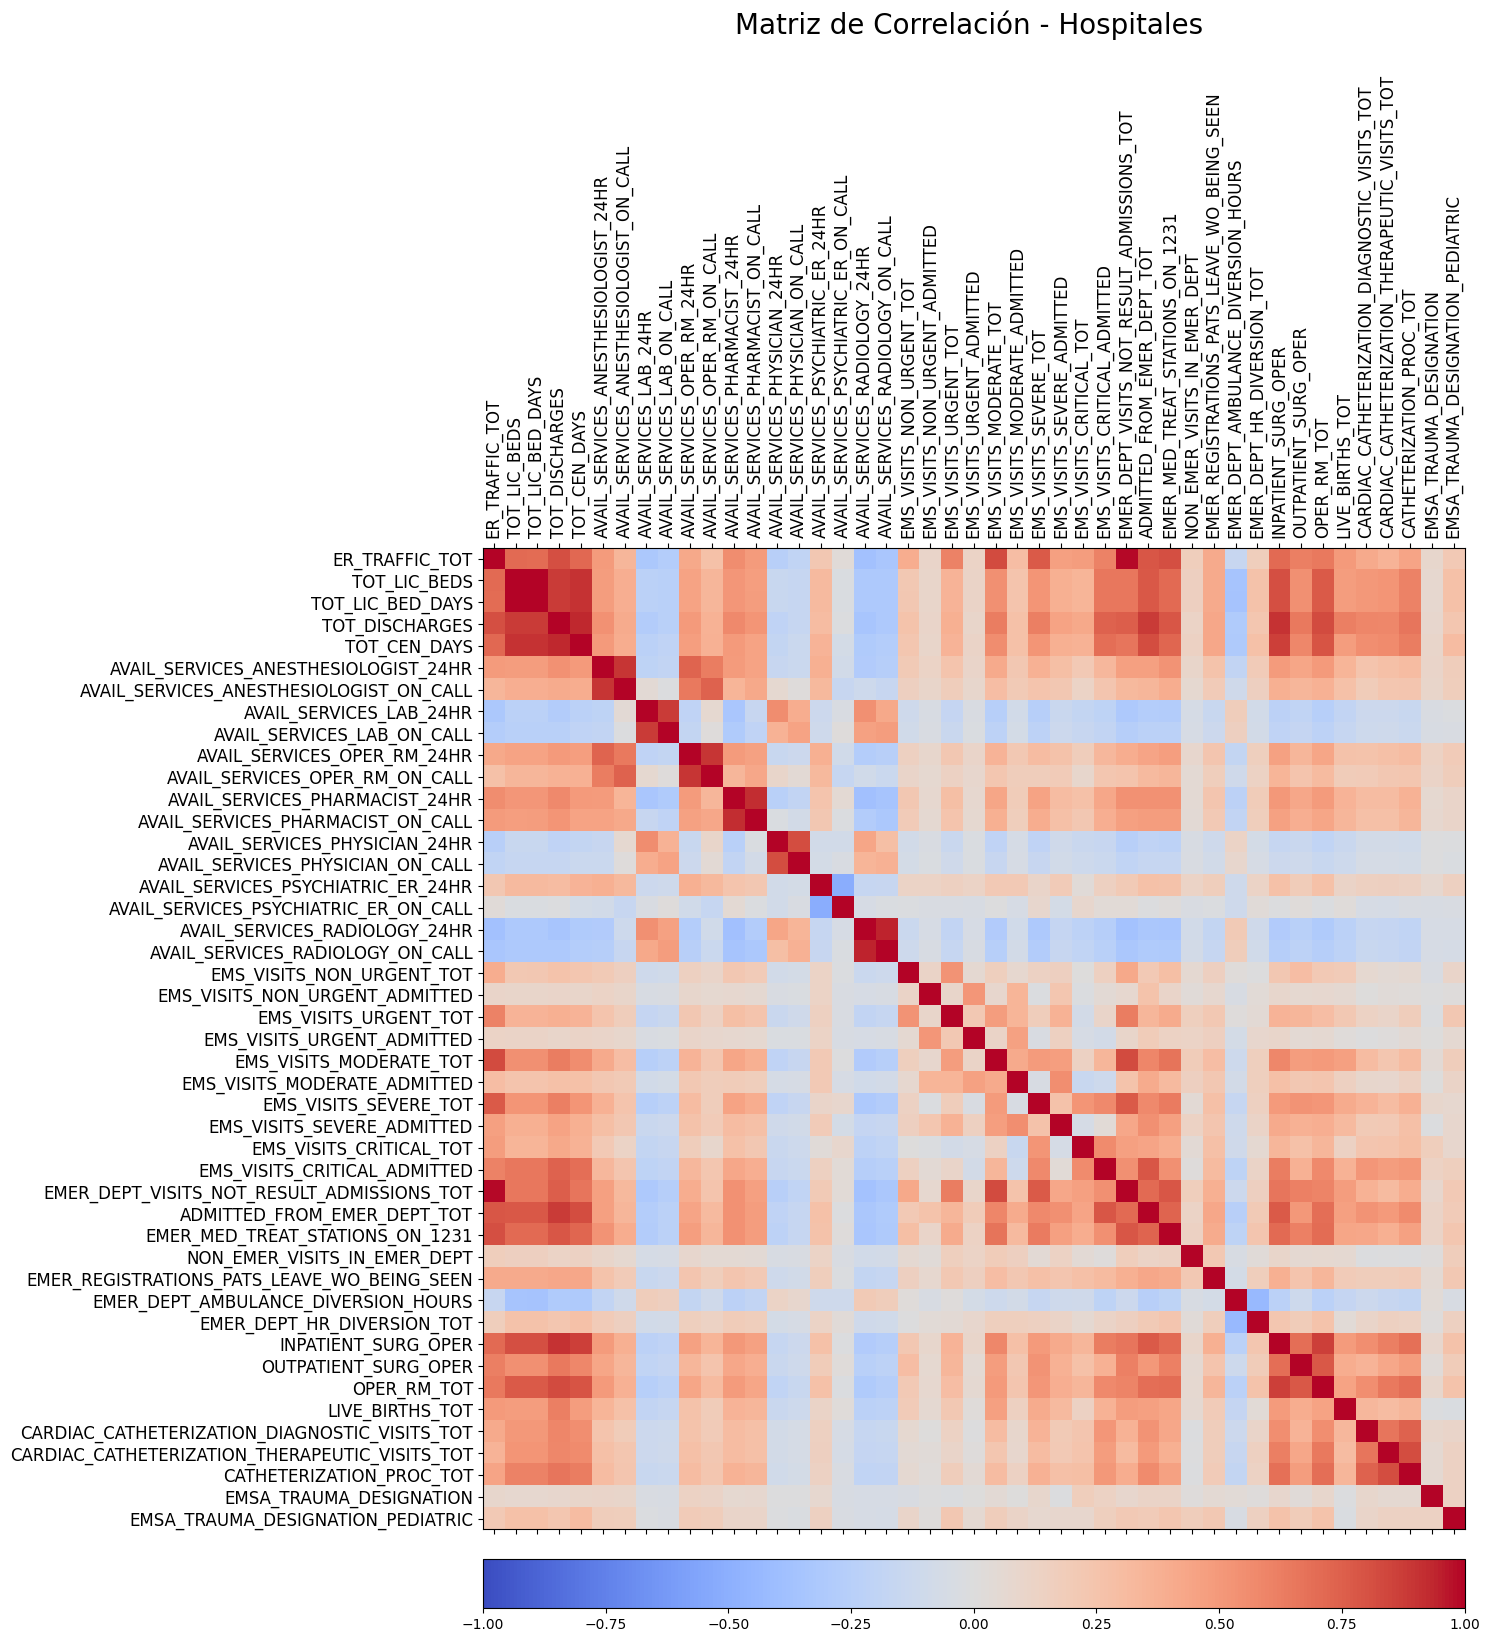

In [144]:
# Hospital
corr = df_hops.corr()
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, orientation='horizontal', pad=0.01)


ticks = np.arange(len(df_hops.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_hops.columns, fontsize=12, rotation=90)
ax.set_yticklabels(df_hops.columns, fontsize=12)
ax.set_title('Matriz de Correlación - Hospitales ', fontsize=20, pad=30)

plt.tight_layout()
plt.show()

In [138]:
# Dividir por solo urgencias e ingresados
df_urg_admit = df_urg.filter(regex="^a_").copy()
df_urg_visita = df_urg.drop(columns=df_urg_admit.columns)
df_urg_admit['ER_TRAFFIC_TOT'] = df['ER_TRAFFIC_TOT']

In [139]:
# Gráficos de correlación

def generar_graficos_correlacion(df_corr, titulo_general):
    corr = df_corr.corr()
    assert 'ER_TRAFFIC_TOT' in corr.columns

    cols = list(corr.columns)
    cols.remove('ER_TRAFFIC_TOT')

    group_disp = [col for col in cols if 'disp' in col.lower()]
    group_dx = [col for col in cols if 'dx' in col.lower()]
    group_ec = [col for col in cols if 'ec' in col.lower()]
    group_age_sex = [col for col in cols if 'age' in col.lower() or 'sex' in col.lower()]
    used_cols = set(group_disp + group_dx + group_ec + group_age_sex)
    group_resto = [col for col in cols if col not in used_cols]

    supergrupos = {
        'Edad, Sexo y Características': group_age_sex + group_resto,
        'Causa y Diagnósticos': group_ec + group_dx,
        'Motivo Alta': group_disp
    }

    comparaciones = [
        ('Edad, Sexo y Características', 'Causa y Diagnósticos'),
        ('Edad, Sexo y Características', 'Motivo Alta'),
        ('Causa y Diagnósticos', 'Motivo Alta')
    ]

    figsize_fija = (16, 12)

    for nombre_1, nombre_2 in comparaciones:
        grupo_1 = supergrupos[nombre_1] + ['ER_TRAFFIC_TOT']
        grupo_2 = supergrupos[nombre_2] + ['ER_TRAFFIC_TOT']

        if len(grupo_1) <= len(grupo_2):
            grupo_filas = grupo_1
            grupo_columnas = grupo_2
            titulo = f'{titulo_general}: {nombre_1} vs {nombre_2}'
        else:
            grupo_filas = grupo_2
            grupo_columnas = grupo_1
            titulo = f'{titulo_general}: {nombre_2} vs {nombre_1}'

        sub_corr = corr.loc[grupo_filas, grupo_columnas]

        fig, ax = plt.subplots(figsize=figsize_fija)
        cax = ax.matshow(sub_corr, cmap='coolwarm', vmin=-1, vmax=1)
        fig.colorbar(cax, orientation='horizontal', pad=0.05)

        ax.set_xticks(np.arange(len(grupo_columnas)))
        ax.set_xticklabels(grupo_columnas, rotation=90, fontsize=14)

        ax.set_yticks(np.arange(len(grupo_filas)))
        ax.set_yticklabels(grupo_filas, fontsize=14)

        ax.set_title(titulo, fontsize=20, pad=30)

        plt.show()


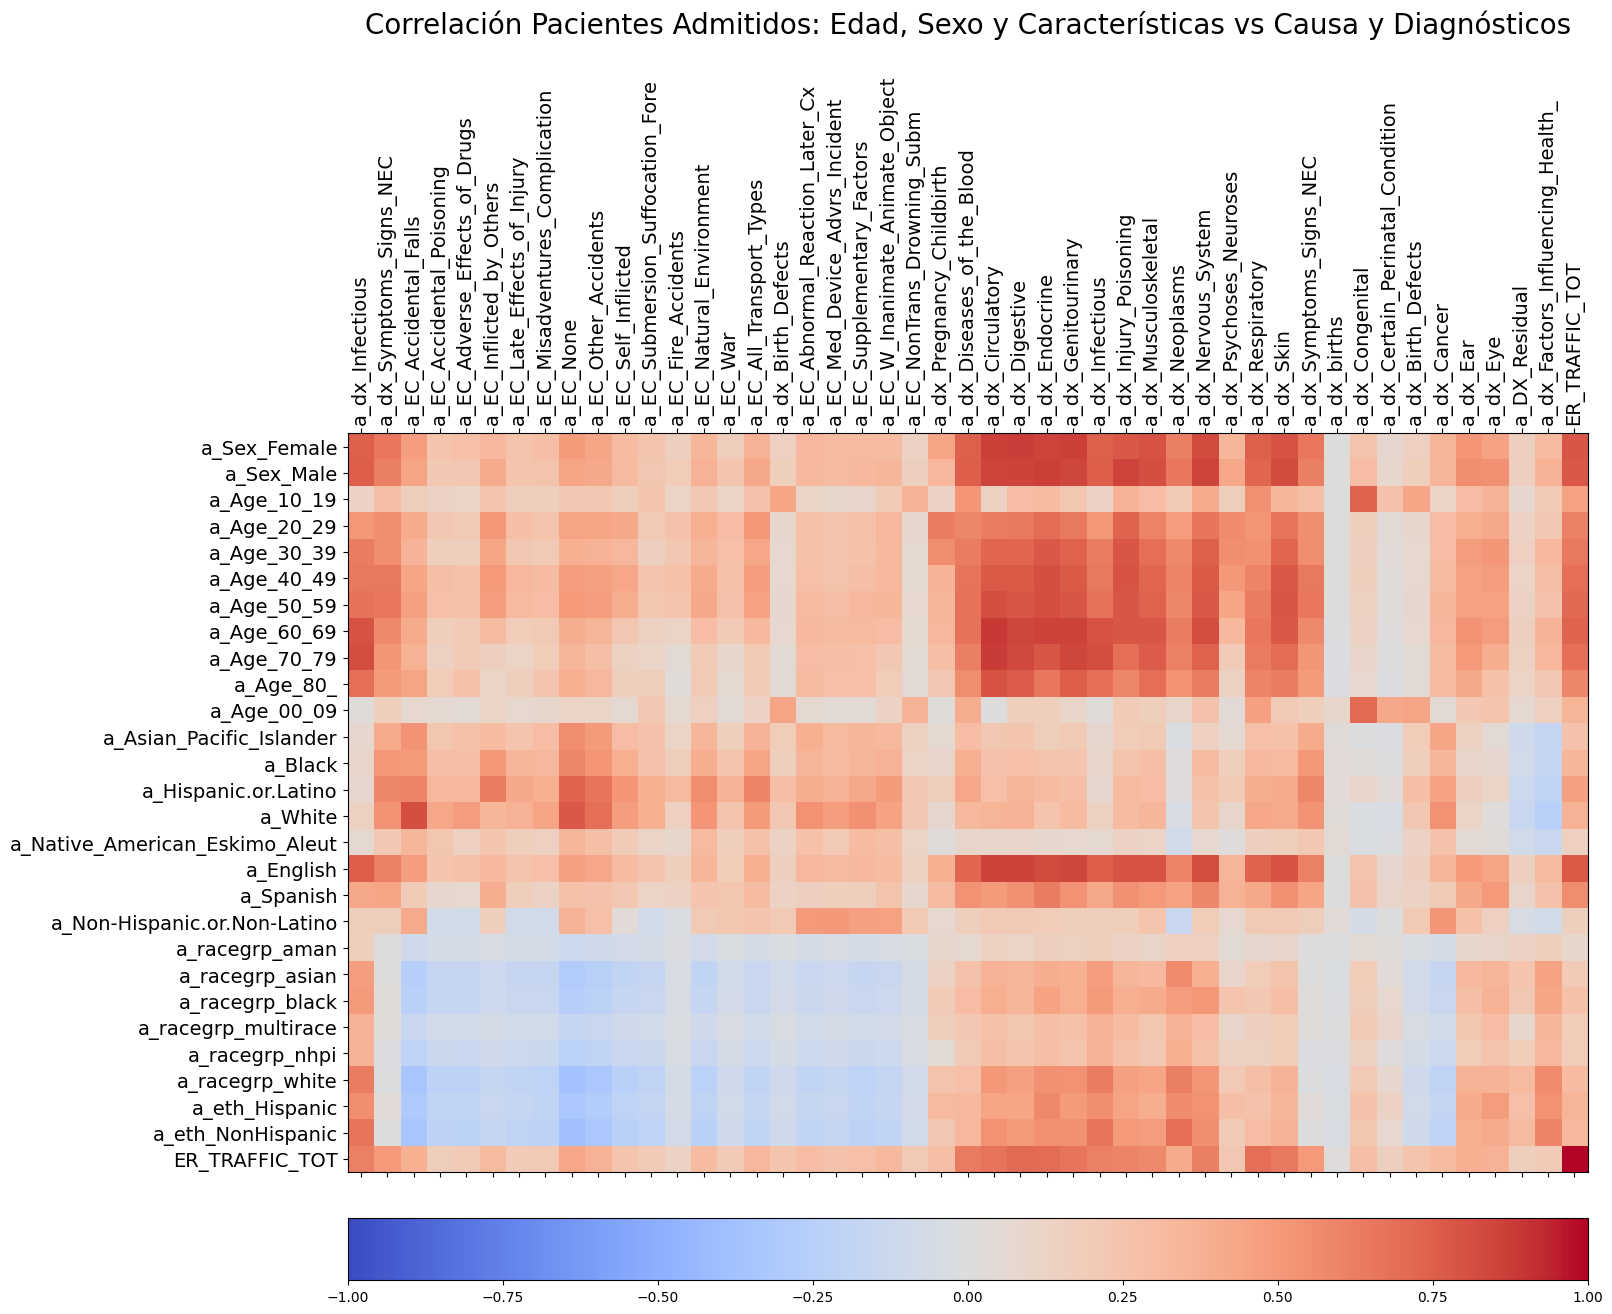

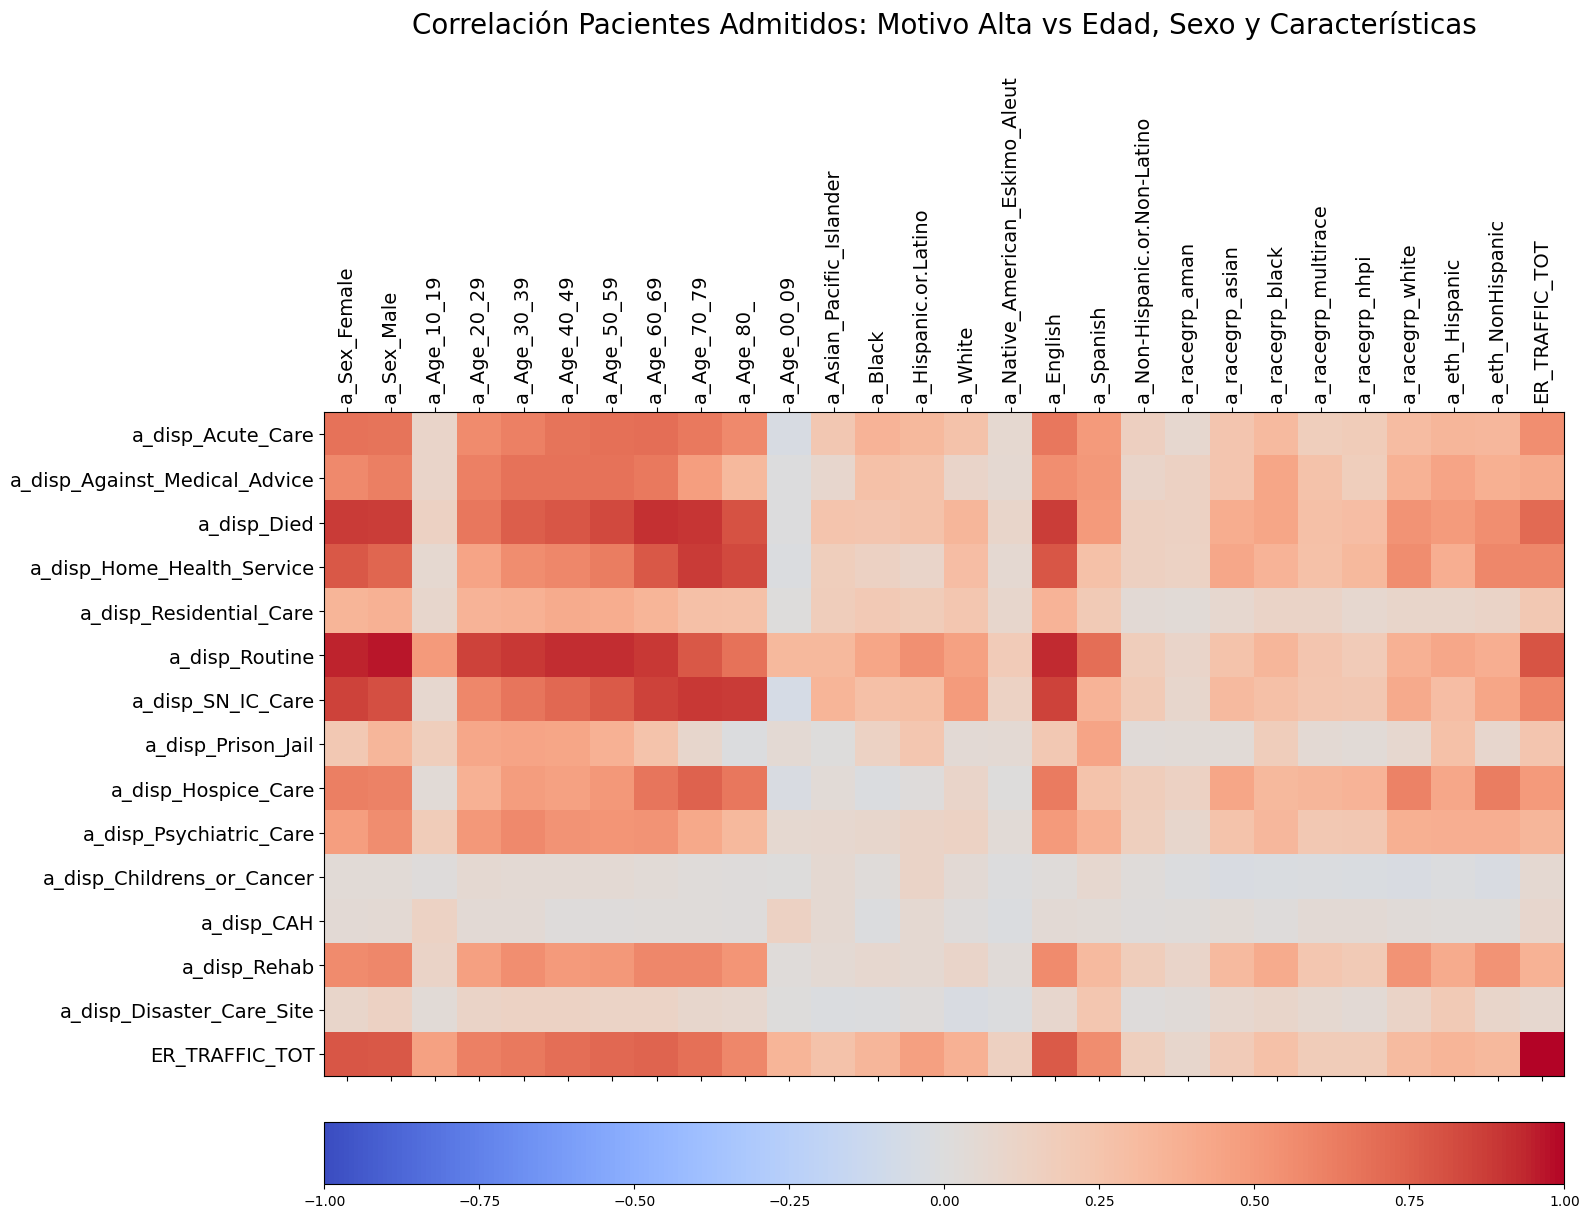

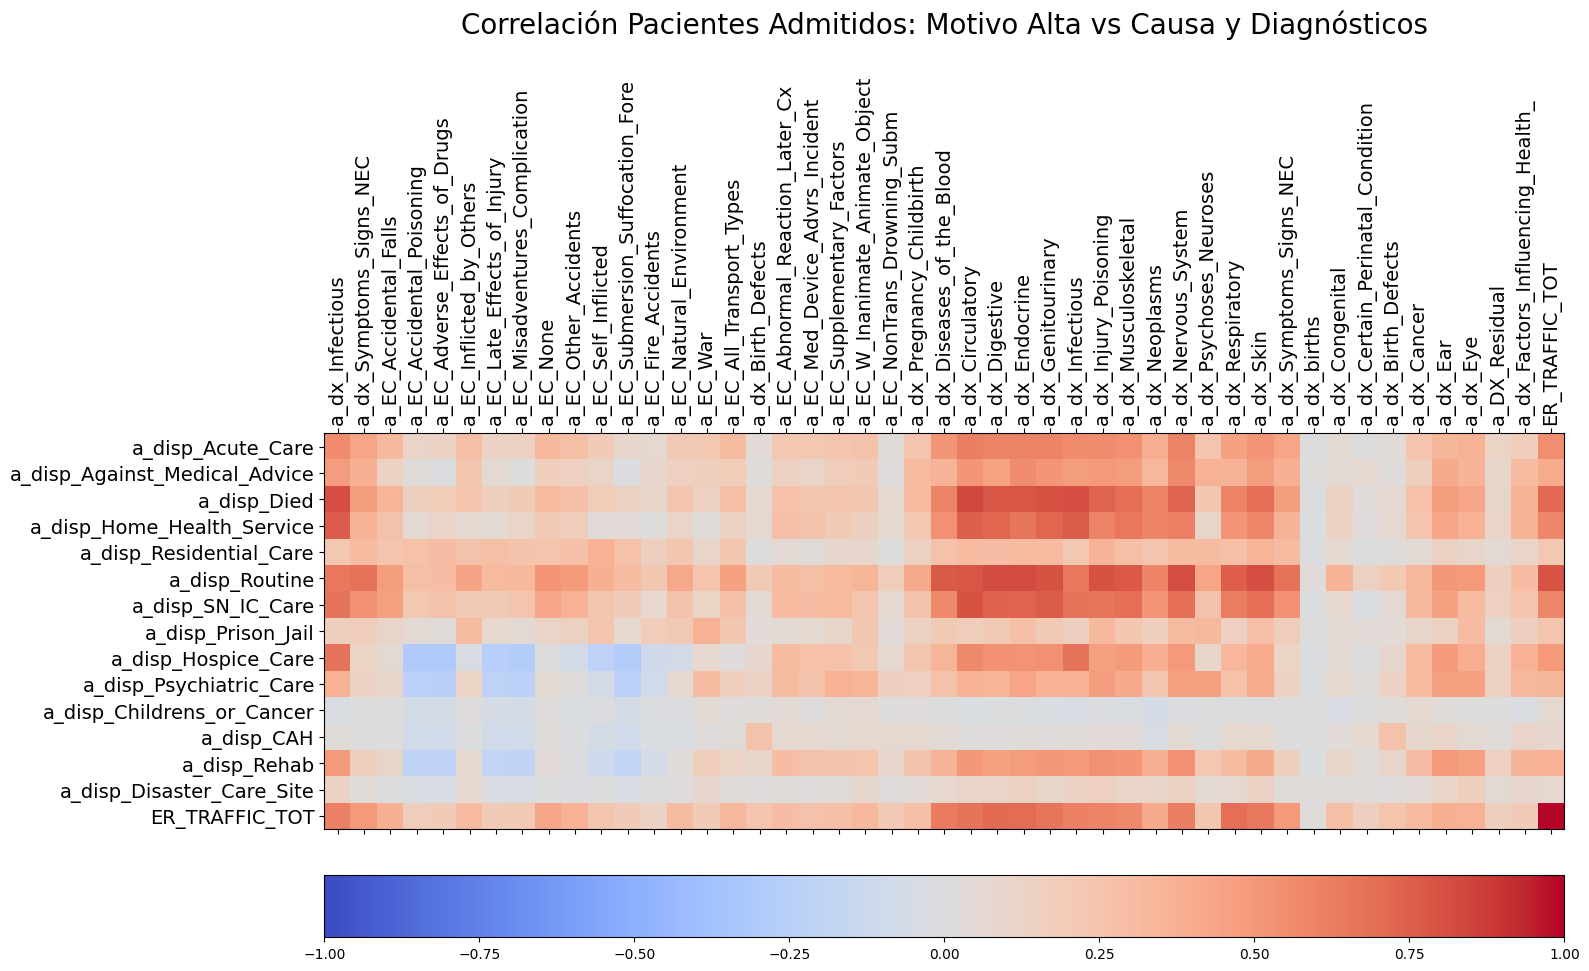

In [135]:
# MATRIZ ADMITIDOS
generar_graficos_correlacion(df_urg_admit, "Correlación Pacientes Admitidos")

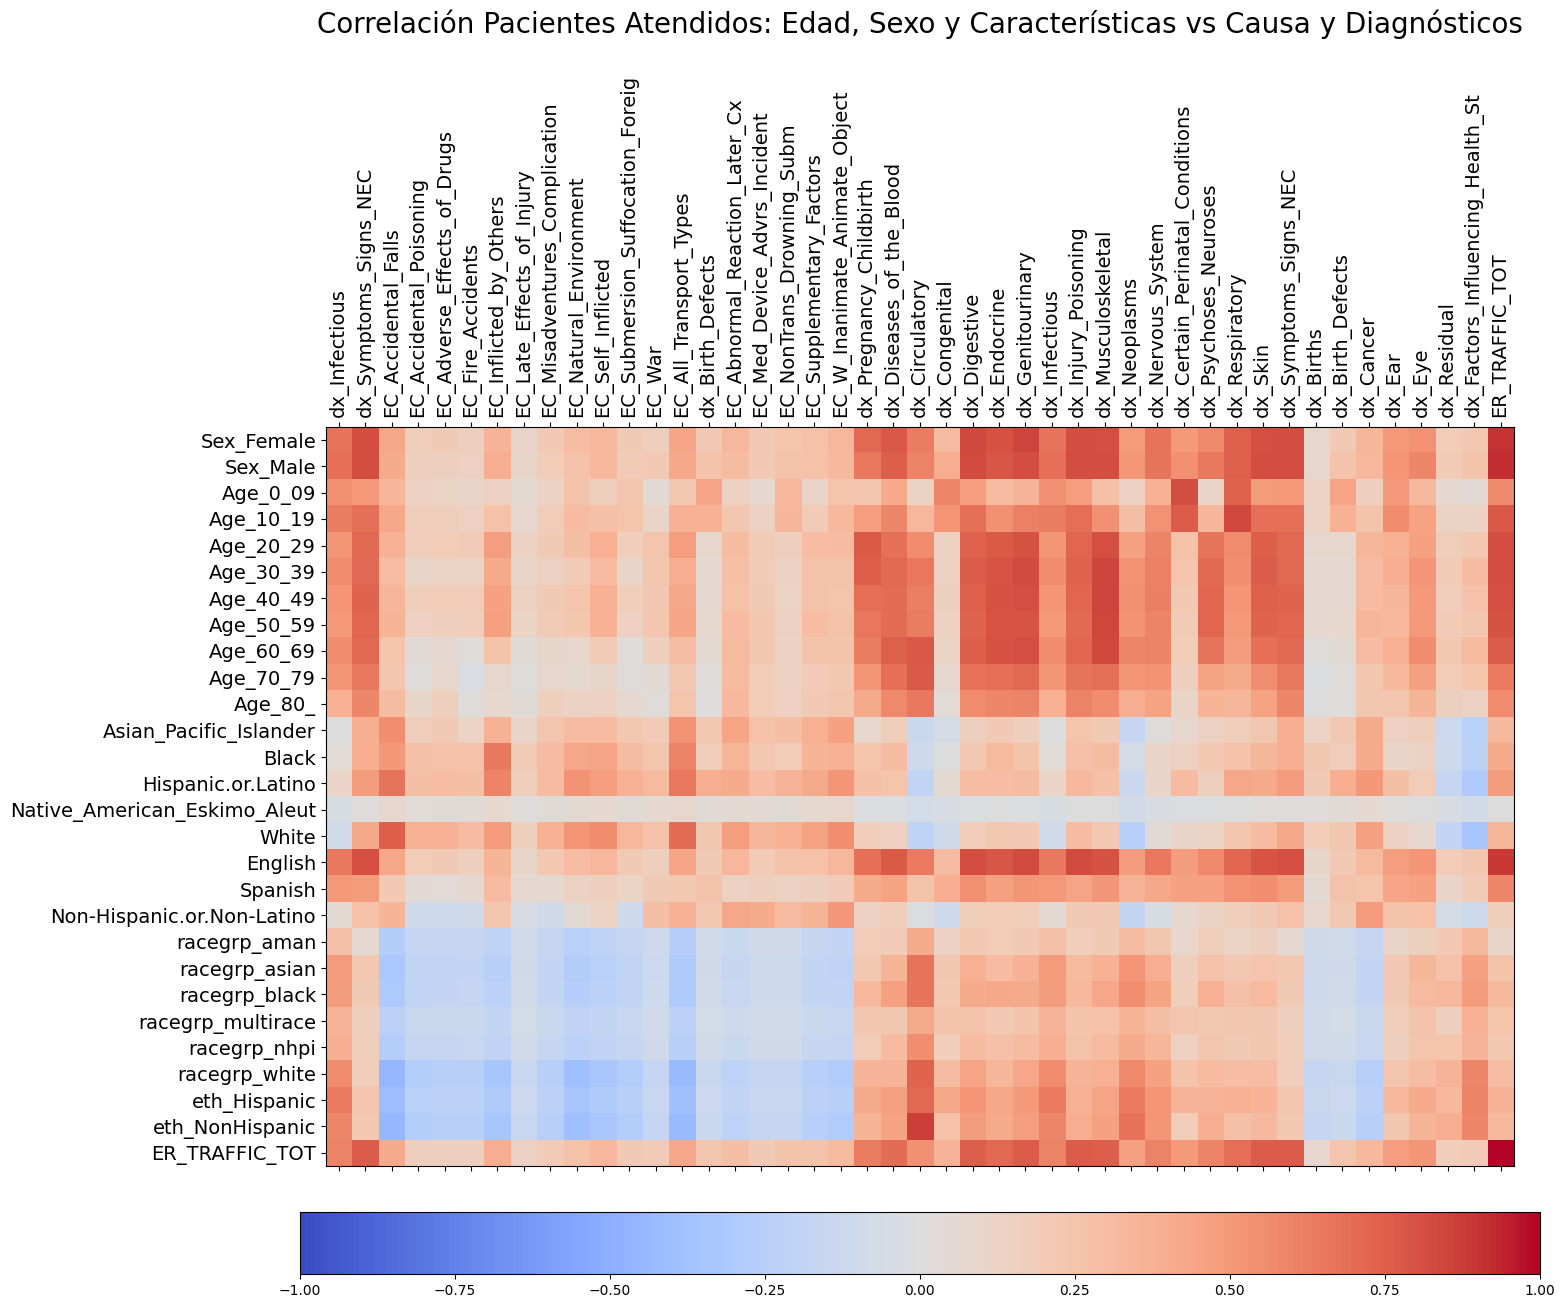

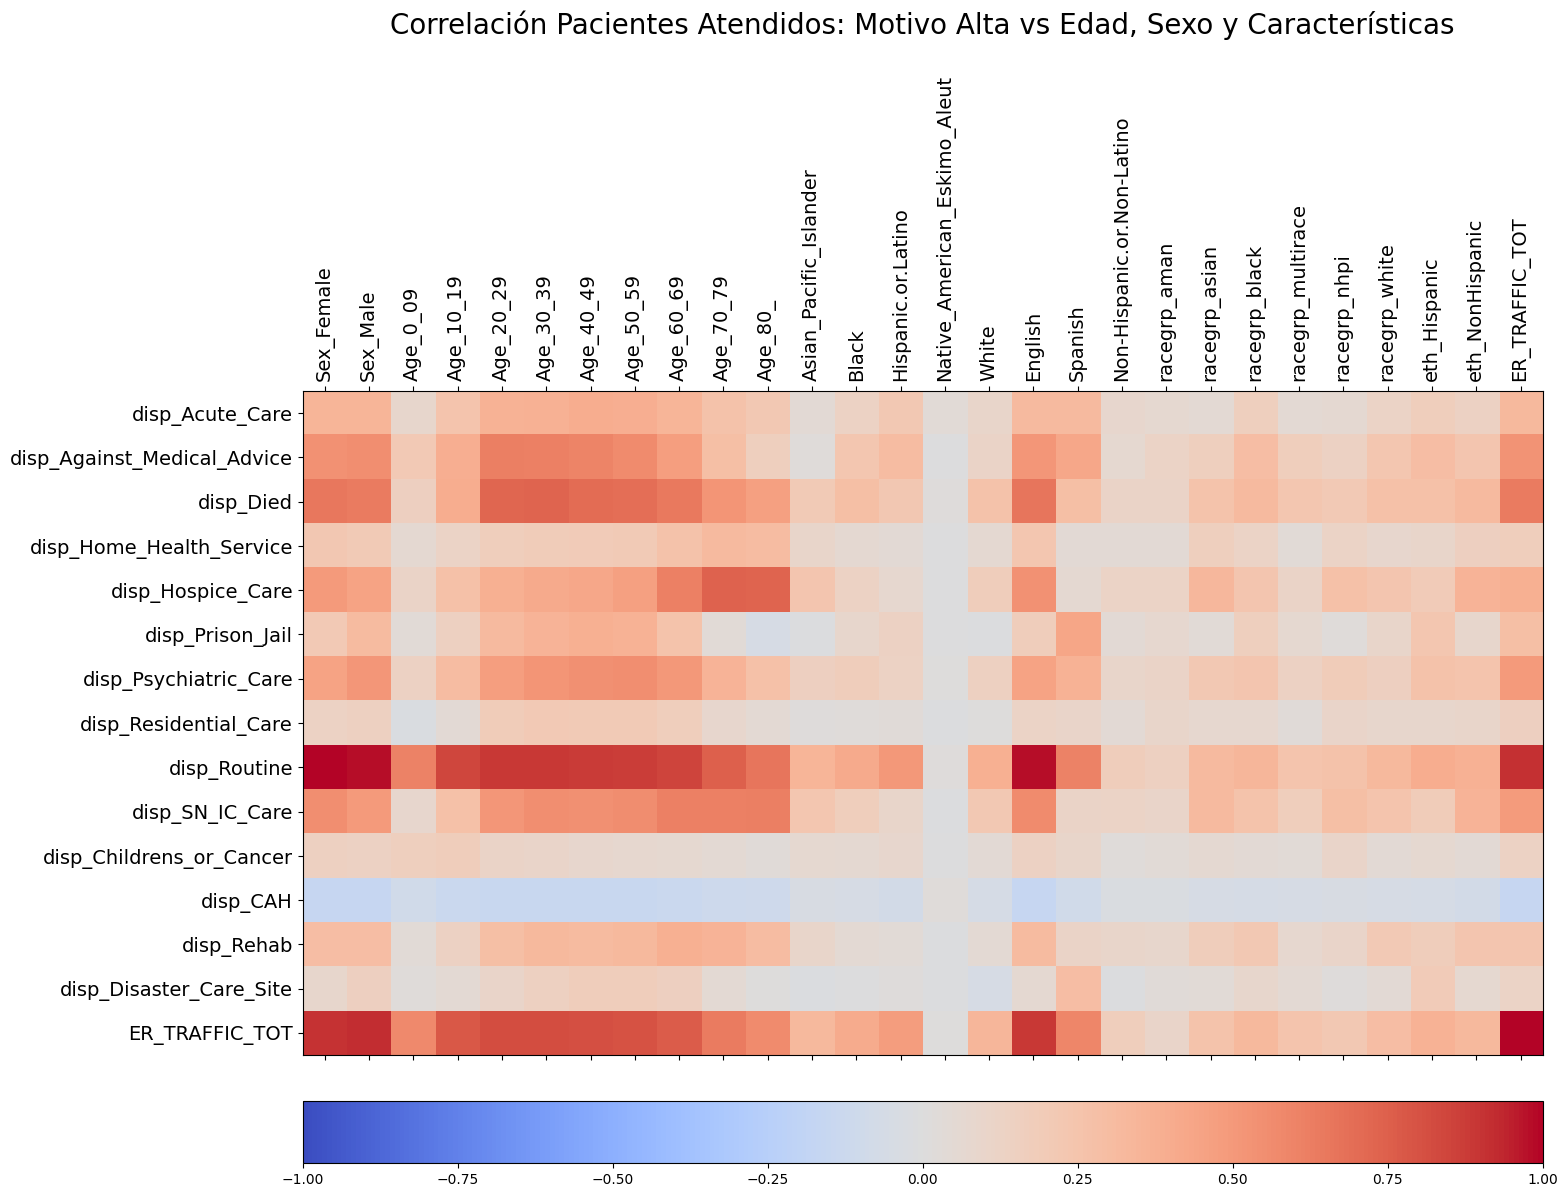

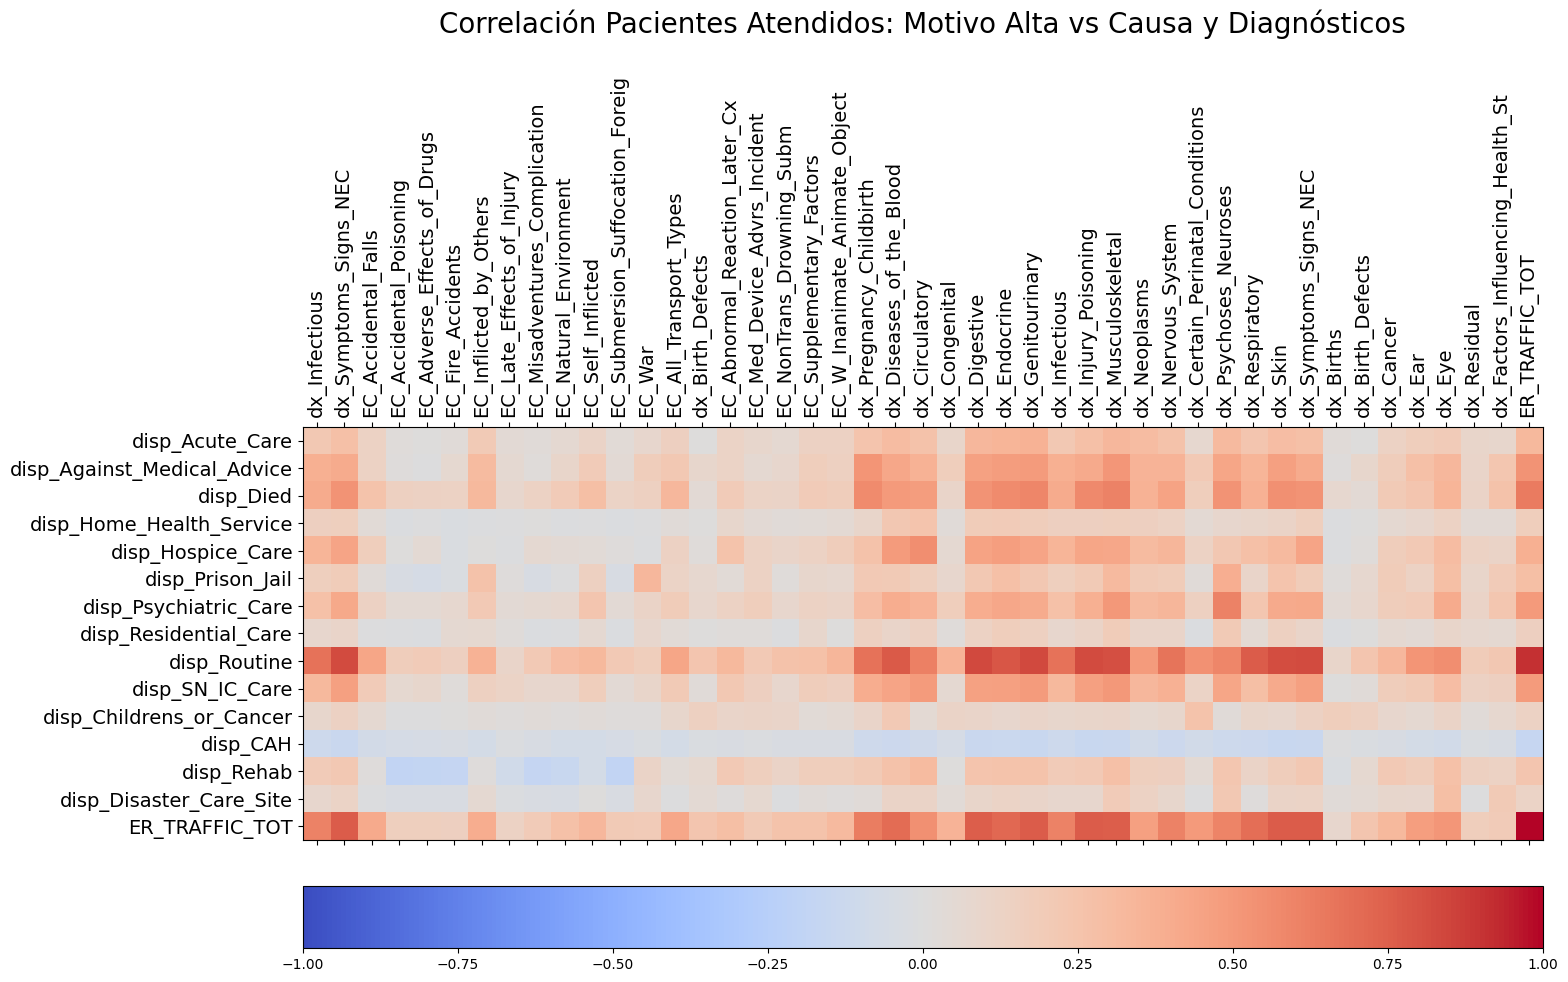

In [140]:
# MATRIZ VISITAS
generar_graficos_correlacion(df_urg_visita, "Correlación Pacientes Atendidos")